In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data_set=pd.read_csv('C:/Users/monis/Downloads/archive (1).csv')

In [46]:
data_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data_set.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [48]:
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
data_set=data_set.drop(['Name','Ticket','Cabin'],axis=1)

In [50]:
data_set.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [51]:
data_set.duplicated().sum()

np.int64(0)

In [63]:
data_set['Sex'] = data_set['Sex'].map({'male': 0, 'female': 1})

In [72]:
data_set['Embarked'] = data_set['Embarked'].map({'S': 0, 'C': 1,'Q':2})

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()

In [75]:
data_set['Age']=scaler.fit_transform(data_set['Age'].values.reshape(-1,1))
data_set['Fare']=scaler.fit_transform(data_set['Fare'].values.reshape(-1,1))

In [76]:
x=data_set.drop('Survived',axis=1)
y=data_set['Survived']

In [77]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,-0.530377,1,0,-0.502445,0.0
1,2,1,1,0.571831,1,0,0.786845,1.0
2,3,3,1,-0.254825,0,0,-0.488854,0.0
3,4,1,1,0.365167,1,0,0.420730,0.0
4,5,3,0,0.365167,0,0,-0.486337,0.0
...,...,...,...,...,...,...,...,...
886,887,2,0,-0.185937,0,0,-0.386671,0.0
887,888,1,1,-0.737041,0,0,-0.044381,0.0
888,889,3,1,NaN,1,2,-0.176263,0.0
889,890,1,0,-0.254825,0,0,-0.044381,1.0


In [78]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
r=RandomForestClassifier(n_estimators=100,random_state=42)
r.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [81]:
y_pred=r.predict(xtest)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [82]:
print("accuracy:",accuracy_score(ytest,y_pred))

accuracy: 0.8324022346368715


In [83]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [84]:
print(confusion_matrix(ytest,y_pred))

[[93 12]
 [18 56]]


In [85]:
survival_rate=data_set.groupby('Age')['Survived'].mean()

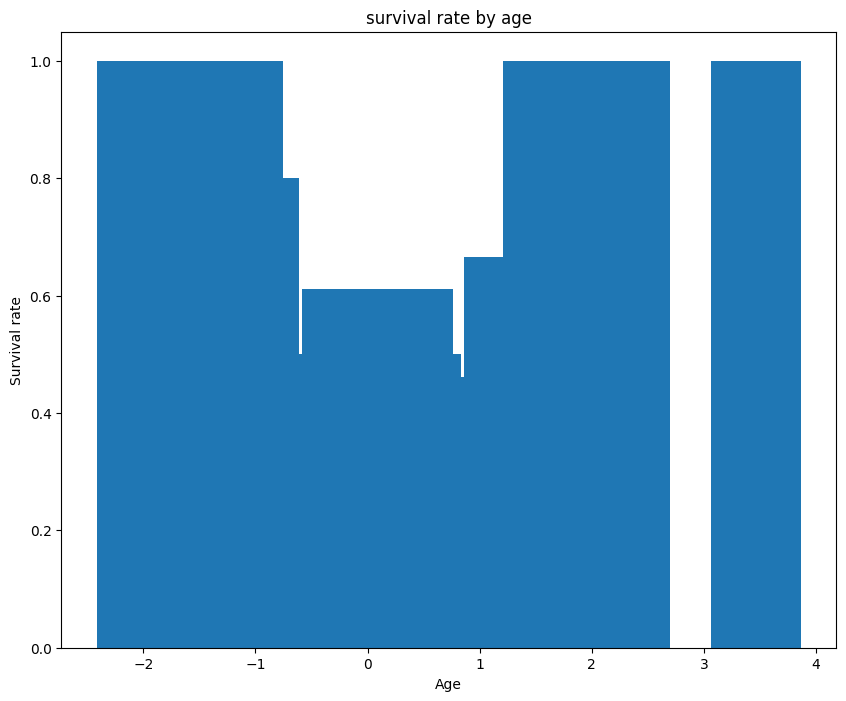

In [86]:
plt.figure(figsize=(10,8))
plt.bar(survival_rate.index,survival_rate.values)
plt.xlabel('Age')
plt.ylabel('Survival rate')
plt.title('survival rate by age')
plt.show()

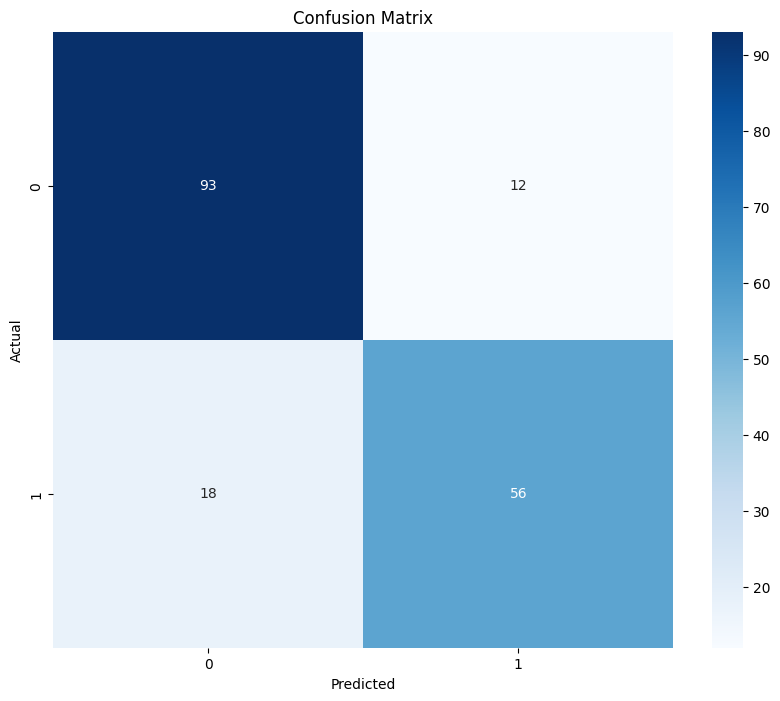

In [87]:
cm=confusion_matrix(ytest,y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()